In [2]:
import math
import numpy as np 

In [3]:
S0 = 100.
K=105.
T=1.0
r=0.05
sigma = 0.2

In [4]:
I=100000

In [5]:
np.random.seed(1000)

In [6]:
z = np.random.standard_normal(I)

In [7]:
ST = 50* np.exp((r-sigma **2/2) * T + sigma * math.sqrt(T)*z)

In [8]:
hT = np.maximum(ST - K, 0)

In [9]:
C0 = math.exp(-r *T) * np.mean(hT)
print('value of the european call option {:5.3f}'.format(C0))


value of the european call option 0.001


In [10]:
#
# 유러피안 콜 옵션의 몬테카를로 가격결정
# bsm_mcs_euro.py
# eseom31
#
import math
import numpy as np

# 매개변수값
S0 = 100. #초기주가 지수 
K = 105. #행사가
T = 1.0 # 만기일 (연)
r = 0.05 # 무위험 이자율
sigma = 0.2 # 변동성 

I = 100000 # 시뮬레이션 횟수 

# 가격결정알고리즘 
z = np.random.standard_normal(I) # 의사 난수 

# 만기 시 주가지수 
ST = S0 * np.exp((r-0.5*sigma **2)* T + sigma * math.sqrt(T)* z)
hT = np.maximum(ST - K, 0) # 만기시 페이오프
C0 = math.exp(-r * T) * np.mean(hT) # 몬테카를로 추정식 

# 결과출력 
print('Value of the European call option',C0)

Value of the European call option 7.988661199032352


In [13]:
from pylab import plt,mpl
import pandas as pd
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

data = pd.read_csv('source/tr_eikon_eod_data.csv')

In [14]:
data = pd.DataFrame(data['.SPX'])

In [15]:
data.dropna(inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 1 to 2215
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


In [17]:
data['rets'] = np.log(data/data.shift(1))
data['vloa'] = data['rets'].rolling(252).std() * np.sqrt(252)

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

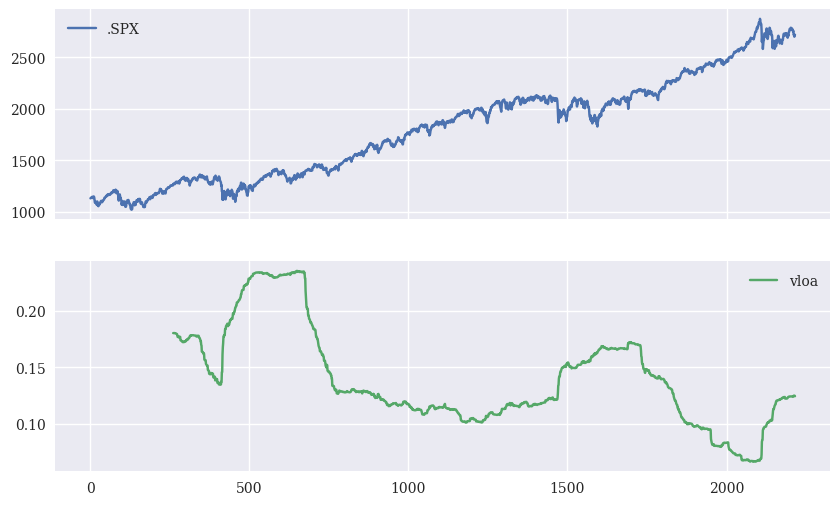

In [18]:
data[['.SPX','vloa']].plot(subplots=True, figsize=(10,6))

#### 병렬화 속도비교

In [19]:
loops = 2500000
a = range(1,loops)
def f(x):
    return 3*math.log(x) + math.cos(x) **2
%timeit r = [f(x) for x in a]

4.77 s ± 286 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
a = np.arange(1, loops)
%timeit r = 3*np.log(a) + np.cos(a)**2

199 ms ± 18.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
import numexpr as ne
ne.set_num_threads(1)
f= '3 * log(a)+ cos(a) **2'
%timeit r = ne.evaluate(f)

180 ms ± 23.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

65.7 ms ± 3.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [1]:
from sklearn.svm import SVC

In [2]:
import pandas as pd 
import numpy as np 

In [6]:
df = pd.read_csv('source/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [11]:
df = pd.DataFrame(df['AAPL.O'])

In [13]:
df['Returns'] = np.log(df/df.shift()) # 전체 데이터 로그 수익률 계산 
df.dropna(inplace=True)

In [14]:
lags = 6

In [15]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    df[col] = np.sign(df['Returns'].shift(lag)) #로그 수익률 데이터를 특정방향으로 ㅈ지연시킨 열 
    cols.append(col)
df.dropna(inplace=True)

In [17]:
df[cols]

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,
2010-01-13,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-14,1.0,-1.0,-1.0,1.0,-1.0,-1.0
2010-01-15,-1.0,1.0,-1.0,-1.0,1.0,-1.0
2010-01-20,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-21,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
...,...,...,...,...,...,...
2018-06-25,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
2018-06-26,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
2018-06-27,1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [19]:
model = SVC(gamma='auto')
model.fit(df[cols], np.sign(df['Returns']))

SVC(gamma='auto')

<AxesSubplot:xlabel='Date'>

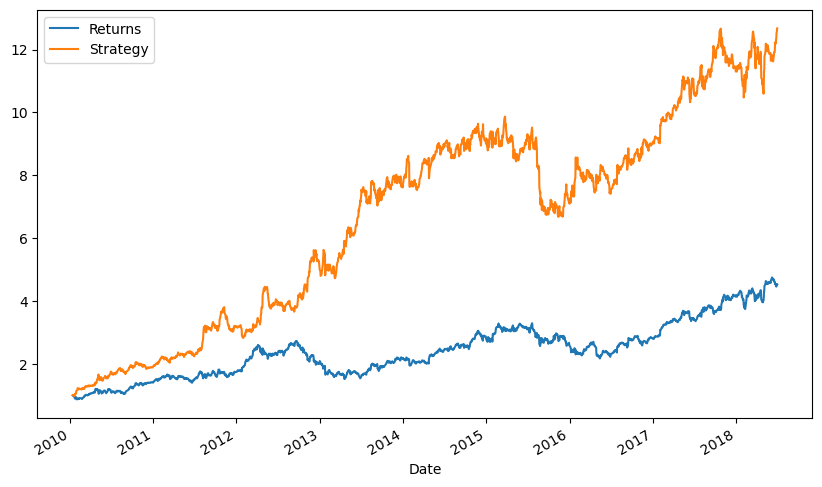

In [21]:
df['Prediction'] =model.predict(df[cols])
df['Strategy'] = df['Prediction'] * df['Returns']
df[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))